In [1]:
import tensorflow as tf

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
random.seed(42)         # Initialize the random number generator.
np.random.seed(42)      # With the seed reset, the same set of numbers will appear every time. 
#tf.set_random_seed(42)  # sets the graph-level random seed
tf.random.set_seed(42)

In [3]:
mnist = tf.keras.datasets.mnist

(Xtrain, Ytrain) , (Xtest, Ytest) = mnist.load_data()

# size of the datsets

print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
Xtrain = Xtrain.reshape((60000, 28*28))    # reshape the input set to size 28*28. 
Xtrain = Xtrain.astype('float32')/255      # normalize to grayscale; set datatype as float32

Xtest = Xtest.reshape((10000, 28*28))      # reshape the input set to size 28*28. 
Xtest = Xtest.astype('float32')/255        # normalize to grayscale; set datatype as float32

Ytrain = tf.keras.utils.to_categorical(Ytrain)
Ytest = tf.keras.utils.to_categorical(Ytest)

In [19]:
dnnModel = models.Sequential()


dnnModel.add(layers.Dense(512, activation='relu', input_shape= (28*28,)))

# Layer 2 = hidden layer  with Regularizers
dnnModel.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l2(0.01)) )

# Layer 3 = hidden layer 
dnnModel.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l2(0.01)))

# Layer 4 = output layer
dnnModel.add(layers.Dense(10, activation='softmax'))

dnnModel.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 512)               401920    
                                                                 
 dense_22 (Dense)            (None, 256)               131328    
                                                                 
 dense_23 (Dense)            (None, 128)               32896     
                                                                 
 dense_24 (Dense)            (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [20]:
dnnModel.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'] )

In [21]:
h = dnnModel.fit( Xtrain, Ytrain, epochs=10, validation_split=0.2, batch_size=64)

Epoch 1/10
750/750 [==============================] - 9s 10ms/step - loss: 0.9137 - accuracy: 0.9327 - val_loss: 0.3764 - val_accuracy: 0.9658
Epoch 2/10
750/750 [==============================] - 7s 9ms/step - loss: 0.3181 - accuracy: 0.9708 - val_loss: 0.2811 - val_accuracy: 0.9719
Epoch 3/10
750/750 [==============================] - 7s 10ms/step - loss: 0.2395 - accuracy: 0.9797 - val_loss: 0.2367 - val_accuracy: 0.9758
Epoch 4/10
750/750 [==============================] - 7s 10ms/step - loss: 0.1942 - accuracy: 0.9847 - val_loss: 0.2021 - val_accuracy: 0.9765
Epoch 5/10
750/750 [==============================] - 7s 10ms/step - loss: 0.1627 - accuracy: 0.9885 - val_loss: 0.1792 - val_accuracy: 0.9793
Epoch 6/10
750/750 [==============================] - 7s 10ms/step - loss: 0.1410 - accuracy: 0.9906 - val_loss: 0.1684 - val_accuracy: 0.9793
Epoch 7/10
750/750 [==============================] - 7s 10ms/step - loss: 0.1242 - accuracy: 0.9926 - val_loss: 0.1657 - val_accuracy: 0.9768


In [22]:
print('Final training loss \t', h.history['loss'][-1])
print('Final training accuracy ', h.history['accuracy'][-1])

Final training loss 	 0.09066088497638702
Final training accuracy  0.9954166412353516


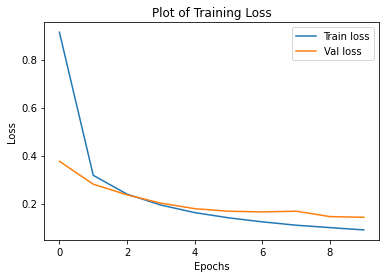

In [23]:
plt.plot(h.history['loss'], label='Train loss')
plt.plot(h.history['val_loss'], label='Val loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Loss')
plt.legend()
plt.show()

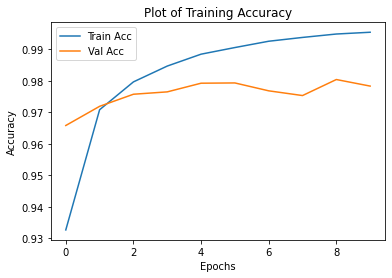

In [24]:
plt.plot(h.history['accuracy'], label='Train Acc')
plt.plot(h.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Plot of Training Accuracy')
plt.legend()
plt.show()

In [25]:
testLoss, testAccuracy = dnnModel.evaluate( Xtest, Ytest)


313/313 [==============================] - 1s 4ms/step - loss: 0.1383 - accuracy: 0.9792


In [26]:
print('Testing loss \t', testLoss)
print('Testing accuracy ', testAccuracy)

Testing loss 	 0.1382555216550827
Testing accuracy  0.979200005531311
